                                                            Assignment No : 9

Name : Shreya Desai

PRN : 22510049

Batch:T3




In [ ]:
import pandas as pd


data = pd.read_csv("/content/Cancer_Data.csv")


data = data.drop(columns=['Unnamed: 32'])


diagnosis = data['diagnosis']

X = data.drop(['id', 'diagnosis'], axis=1)


X = X.fillna(X.mean())


print("Any missing values left?", X.isnull().values.any())


Any missing values left? False


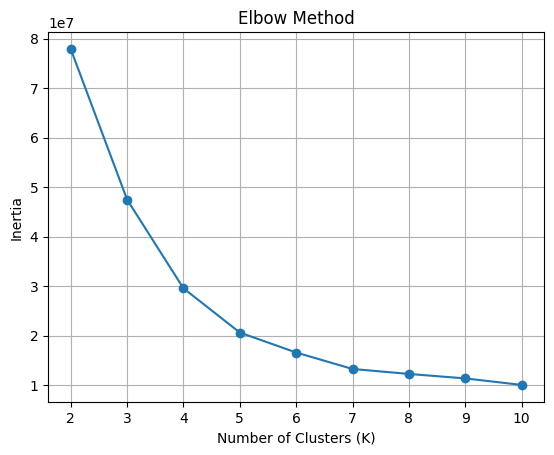

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The graph starts very steep from K = 2 to 4.

Then, it starts to become flat from K = 5 onward.

This point (K = 2 or 3) where the curve bends like an elbow is the best choice.

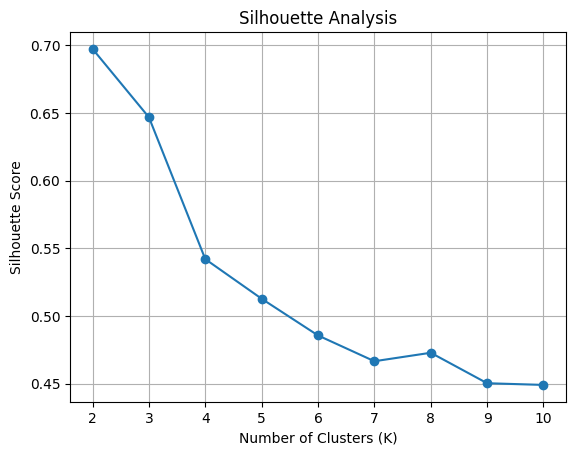

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)


plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Silhouette score is highest at K = 2 (around 0.70).

After that, the score drops as K increases.

So, best clustering (where groups are clearly separated) is at K = 2.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
diagnosis_encoded = le.fit_transform(diagnosis)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


score = homogeneity_score(diagnosis_encoded, kmeans_labels)
print("Homogeneity Score:", score)


Homogeneity Score: 0.42229071246999117


 If the score is close to 1 → Clustering is very good, matching the diagnosis well.
 If it’s close to 0 → Clustering is not matching the actual labels.

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


for eps_val in [0.5, 1, 1.5, 2]:
    dbscan = DBSCAN(eps=eps_val, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps_val}, Clusters found: {n_clusters}")


eps=0.5, Clusters found: 0
eps=1, Clusters found: 0
eps=1.5, Clusters found: 1
eps=2, Clusters found: 4


In [ ]:

dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Calculate homogeneity
dbscan_homogeneity = homogeneity_score(diagnosis_encoded, dbscan_labels)
print("Homogeneity Score (DBSCAN):", dbscan_homogeneity)


Homogeneity Score (DBSCAN): 0.2207537616746724


 DBSCAN worked only when eps = 2, giving 4 clusters. But the homogeneity score was just 0.2207, which is very low.
That means DBSCAN couldn't match the clusters with actual diagnosis at all.
So, DBSCAN didn’t perform well for this dataset.

 With KMeans, I found the best number of clusters was 2 (confirmed using Elbow and Silhouette methods). It gave a high homogeneity score, showing that it matched well with actual cancer diagnosis.

I removed the ID and diagnosis columns from the data. I kept the diagnosis separately to check later how good the clustering is.

I used KMeans to divide the data. I found that 2 groups (clusters) work best.

KMeans gave a good result. The groups it made were similar to real labels (cancer types).

I tried DBSCAN with different settings. Only when eps = 2, it made proper groups.

But DBSCAN’s result was not accurate. The groups didn’t match well with the real cancer types. So, KMeans was better.
